In [1]:
# ========================
# Package Installation and Library Imports
# ========================
install.packages("xlsx")
install.packages("scorecard")
install.packages("Information")
install.packages("gmodels")
library("gmodels")
library(ggplot2)
library("scorecard")
library("Information")
library("xlsx")
install.packages("caret")
library(caret)
library("dplyr")
install.packages('corrplot')
install.packages('corrplot')
library(ROCR)

Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'scorecard' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'Information' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Warning message:
"package 'gmodels' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'scorecard' was built under R version 4.2.3"
Warning message:
"package 'Information' was built under R version 4.2.3"
Warning message:
"package 'xlsx' was built under R version 4.2.3"
Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'dplyr' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Installing package into 'C:/Users/c22100089/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\c22100089\AppData\Local\Temp\RtmpEB1T1N\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [2]:
# ========================
# Data Import
# ========================
# Read the German Credit Dataset
df <- read.xlsx("GermanCreditData.xlsx", 1)

In [3]:
# ========================
# Data Preprocessing
# ========================
# Replace all occurrences of "X" with 10 in the Purpose column and convert to numeric
df$Purpose <- as.numeric(gsub("X", "10", df$Purpose))

In [4]:
# Creating subsets based on the 'Checking' attribute
# Subset 1: Applicants with Checking = 1 or Checking = 2
s1 <- df[df$Checking %in% c(1, 2), ]
# Subset 2: Applicants with Checking = 3 or Checking = 4
s2 <- df[df$Checking %in% c(3, 4), ]

In [5]:
# Splitting the dataset on 60:40 ratio 
s1_traintest = split_df(s1, y = "Good", ratio = 0.6, seed = 42)
s2_traintest = split_df(s2, y = "Good", ratio = 0.6, seed =42)
s1_train <- s1_traintest$train
s1_test <- s1_traintest$test
s2_train <- s2_traintest$train
s2_test <- s2_traintest$test

Warning message in split_df.data.frame(s1, y = "Good", ratio = 0.6, seed = 42):
"The ratios is set to c(0.6, 0.4)"
Warning message in split_df.data.frame(s2, y = "Good", ratio = 0.6, seed = 42):
"The ratios is set to c(0.6, 0.4)"


In [27]:
# ========================
# Exploratory Data Analysis (EDA) & Feature Selection
# ========================
# Calculate Information Value (IV) to understand predictive power of variables
s1_info <- create_infotables(s1_train, NULL, y="Good")
s1_info$Summary
s2_info <- create_infotables(s2_train, NULL, y="Good")
s2_info$Summary

,Variable,IV
,<chr>,<dbl>
2,Duration,3.807337e-01
3,History,2.271718e-01
12,Property,1.910206e-01
5,Amount,1.583746e-01
6,Savings,1.566883e-01
13,Age,1.541621e-01
17,Job,1.360419e-01
4,Purpose,1.279107e-01
20,Foreign,6.109180e-02


,Variable,IV
,<chr>,<dbl>
14,Other,5.101405e-01
7,Emploed,4.872144e-01
13,Age,4.025327e-01
3,History,3.365125e-01
2,Duration,2.181962e-01
4,Purpose,1.957284e-01
5,Amount,1.925408e-01
11,Resident,9.952320e-02
6,Savings,7.957232e-02


In [8]:
# Conduct chi-square tests to understand relationships between categorical variables and target 'Good'
# For subset 1
with(s1_train, CrossTable(Good, Savings, digits = 1, prop.chisq = F, chisq = T))
with(s1_train, CrossTable(Good, History, digits = 1, prop.chisq = F, chisq = T))
with(s1_train, CrossTable(Good, Checking, digits = 1, prop.chisq = F, chisq = T))

Warning message in chisq.test(t, correct = FALSE, ...):
"Chi-squared approximation may be incorrect"



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  341 

 
             | Savings 
        Good |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |       118 |        19 |         4 |         3 |        12 |       156 | 
             |       0.8 |       0.1 |       0.0 |       0.0 |       0.1 |       0.5 | 
             |       0.5 |       0.5 |       0.4 |       0.3 |       0.2 |           | 
             |       0.3 |       0.1 |       0.0 |       0.0 |       0.0 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |       117 |        18 |         5 |         8 |        37 |       185 | 
             |       0.6 |       0.1 |       

In [12]:
# Run the chi-square test on the categorical features of s2
with(s2_train, CrossTable(Good, Other, digits = 1, prop.chisq = F, chisq = T))
with(s2_train, CrossTable(Good, History, digits = 1, prop.chisq = F, chisq = T))
with(s2_train, CrossTable(Good, Purpose, digits = 1, prop.chisq = F, chisq = T))

Warning message in chisq.test(t, correct = FALSE, ...):
"Chi-squared approximation may be incorrect"



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  286 

 
             | Other 
        Good |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           0 |        17 |         3 |        23 |        43 | 
             |       0.4 |       0.1 |       0.5 |       0.2 | 
             |       0.4 |       0.2 |       0.1 |           | 
             |       0.1 |       0.0 |       0.1 |           | 
-------------|-----------|-----------|-----------|-----------|
           1 |        27 |         9 |       207 |       243 | 
             |       0.1 |       0.0 |       0.9 |       0.8 | 
             |       0.6 |       0.8 |       0.9 |           | 
             |       0.1 |       0.0 |       0.7 |           | 
-------------|-----------|-----------|---------

Warning message in chisq.test(t, correct = FALSE, ...):
"Chi-squared approximation may be incorrect"



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  286 

 
             | History 
        Good |         0 |         1 |         2 |         3 |         4 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |         3 |         3 |        24 |         5 |         8 |        43 | 
             |       0.1 |       0.1 |       0.6 |       0.1 |       0.2 |       0.2 | 
             |       0.8 |       0.3 |       0.2 |       0.2 |       0.1 |           | 
             |       0.0 |       0.0 |       0.1 |       0.0 |       0.0 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |         1 |         8 |       119 |        17 |        98 |       243 | 
             |       0.0 |       0.0 |       

Warning message in chisq.test(t, correct = FALSE, ...):
"Chi-squared approximation may be incorrect"



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  286 

 
             | Purpose 
        Good |         0 |         1 |         2 |         3 |         4 |         5 |         6 |         8 |         9 |        10 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |        10 |         2 |         8 |        11 |         0 |         1 |         3 |         0 |         8 |         0 |        43 | 
             |       0.2 |       0.0 |       0.2 |       0.3 |       0.0 |       0.0 |       0.1 |       0.0 |       0.2 |       0.0 |       0.2 | 
             |       0.2 |       0.1 |       0.2 |       0.1 |       0.0 |       0.2 |       0.2 |       0.0 |       0.3 |       0.0 |           | 
        

In [13]:
# ========================
# Data Binning for Scorecard Development
# ========================
# Binning continuous variables using Weight of Evidence (WoE) approach
# For subset 1
s1_trainsubset <- s1_train[,c('Savings', 'History', 'Property', 'Duration', 'Good')]

In [17]:
# Woe Binning for s1_trainsubset
woebin(s1_trainsubset, y = "Good", method="chimerge", positive="bad|0")

# Checking which breaks are the best for Duration
woebin(s1_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Savings', 'History', 'Property'), breaks_list = list(Duration = c(8, 20, 34, 46)))

woebin(s1_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Savings', 'History', 'Duration'), breaks_list = list(Property = c(2,3)))

woebin(s1_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Savings', 'Property', 'Duration'), breaks_list = list(History = c(1,2)))

woebin(s1_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Property', 'History', 'Duration'), breaks_list = list(Savings = c(2,4)))

#Property (Categorical): Merging categories ”-Inf,2” and ”2,3” due to similar
#WoE values; optimal breaks at 2 and 3.
                                                                                                                                            
#History (Categorical): Merging categories ”-Inf,1” and ”1,2” based on similar
#WoE values; optimal breaks at 1 and 2.
                                                                                                                                            
#Savings (Categorical): Merging categories ”-Inf,2” and ”2,4” due to similar
#WoE values; optimal break at 2 and 4.
                                                                                                                                            
#Duration (Continuous): Merging categories ”8-12”, ”12-16”, and ”16-20” based
#on similar WoE values; best class splits at 8, 20, 34, and 46   

ℹ Creating woe binning ...


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Savings,"[-Inf,2)",235,0.6891496,117,118,0.5021277,0.1790105,0.022193333,0.1626494,2,FALSE
Savings,"[2,4)",46,0.1348974,23,23,0.5000000,0.1704998,0.003940519,0.1626494,4,FALSE
Savings,"[4, Inf)",60,0.1759531,45,15,0.2500000,-0.9281125,0.136515504,0.1626494,Inf,FALSE
variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
History,"[-Inf,1)",23,0.06744868,6,17,0.7391304,1.21195369,0.0927652705,0.2271718,1,FALSE
History,"[1,2)",20,0.05865103,6,14,0.7000000,1.01779768,0.0583311628,0.2271718,2,FALSE
History,"[2,3)",194,0.56891496,104,90,0.4639175,0.02591859,0.0003825821,0.2271718,3,FALSE
History,"[3,4)",29,0.08504399,19,10,0.3448276,-0.47135407,0.0181943324,0.2271718,4,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Duration,"[-Inf,8)",20,0.05865103,16,4,0.2000000,-1.21579454,0.0739755793,0.3622465,8,FALSE
Duration,"[8,20)",150,0.43988270,94,56,0.3733333,-0.34744327,0.0518155180,0.3622465,20,FALSE
Duration,"[20,34)",102,0.29912023,54,48,0.4705882,0.05271678,0.0008329471,0.3622465,34,FALSE
Duration,"[34,46)",39,0.11436950,15,24,0.6153846,0.64050345,0.0466062799,0.3622465,46,FALSE
Duration,"[46, Inf)",30,0.08797654,6,24,0.8000000,1.55679418,0.1890161747,0.3622465,Inf,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Property,"[-Inf,2)",95,0.2785924,64,31,0.3263158,-0.5543961,0.081622622,0.1613026,2,FALSE
Property,"[2,3)",90,0.2639296,52,38,0.4222222,-0.1431577,0.005367175,0.1613026,3,FALSE
Property,"[3, Inf)",156,0.4574780,69,87,0.5576923,0.4023014,0.074312853,0.1613026,Inf,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
History,"[-Inf,1)",23,0.06744868,6,17,0.7391304,1.211954,0.09276527,0.1717738,1,FALSE
History,"[1,2)",20,0.05865103,6,14,0.7000000,1.017798,0.05833116,0.1717738,2,FALSE
History,"[2, Inf)",298,0.87390029,173,125,0.4194631,-0.154478,0.02067736,0.1717738,Inf,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Savings,"[-Inf,2)",235,0.6891496,117,118,0.5021277,0.1790105,0.022193333,0.1626494,2,FALSE
Savings,"[2,4)",46,0.1348974,23,23,0.5000000,0.1704998,0.003940519,0.1626494,4,FALSE
Savings,"[4, Inf)",60,0.1759531,45,15,0.2500000,-0.9281125,0.136515504,0.1626494,Inf,FALSE


In [ ]:
# For subset 2
s2_trainsubset <- s2_train[,c('Duration', 'History', 'Purpose', 'Age', 'Good')]

In [18]:
# Woe Binning for s2_trainsubset
woebin(s2_trainsubset, y = "Good", method="chimerge", positive="bad|0")

woebin(s2_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Age', 'History', 'Duration'), breaks_list = list(Purpose = c(1,3,6)))

woebin(s2_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Purpose', 'History', 'Age'), breaks_list = list(Duration = c(12,26,34)))

woebin(s2_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Purpose', 'History', 'Duration'), breaks_list = list(Age = c(24,32)))

woebin(s2_trainsubset, y = "Good", method="chimerge", positive="bad|0", var_skip = c('Pupose', 'Age', 'Duration'), breaks_list = list(History = c(2)))

#Duration (Continuous): Merging categories ”0-12”, ”12-26”, ”26-34” based on
#WoE values and count distribution; optimal class splits at 12, 26, and 34.
                                                                                                                                      
#History (Categorical): Merging categories ”0-2” and ”2-4” based on WoE values
#and count distribution; optimal break at 2.
                                                                                                                                      
#Age (Continuous): Merging categories ”0-24”, ”24-32”, and ”32-47” based on
#WoE values and count distribution; optimal class splits at 24 and 32. .
#18
                                                                                                                                      
#Purpose (Categorical): Merging categories ”0-1”, ”1-3”, ”3-6”, and ”6-Inf”
#based on WoE values and count distribution; optimal breaks at 1, 3, and 6.

ℹ Creating woe binning ...


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Duration,"[-Inf,8)",20,0.05865103,16,4,0.2000000,-1.215794543,7.397558e-02,0.3962903,8,FALSE
Duration,"[8,12)",30,0.08797654,21,9,0.3000000,-0.676798043,3.777968e-02,0.3962903,12,FALSE
Duration,"[12,16)",74,0.21700880,48,26,0.3513514,-0.442604655,4.107052e-02,0.3962903,16,FALSE
Duration,"[16,20)",46,0.13489736,25,21,0.4565217,-0.003853569,2.002895e-06,0.3962903,20,FALSE
Duration,"[20,30)",84,0.24633431,43,41,0.4880952,0.122871769,3.733837e-03,0.3962903,30,FALSE
Duration,"[30,34)",18,0.05278592,11,7,0.3888889,-0.281485306,4.106213e-03,0.3962903,34,FALSE
Duration,"[34,46)",39,0.11436950,15,24,0.6153846,0.640503447,4.660628e-02,0.3962903,46,FALSE
Duration,"[46, Inf)",30,0.08797654,6,24,0.8000000,1.556794179,1.890162e-01,0.3962903,Inf,FALSE
variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Purpose,"[-Inf,1)",86,0.2521994,37,49,0.5697674,0.45140220,0.0515061488,0.0793427,1,FALSE
Purpose,"[1,3)",103,0.3020528,61,42,0.4077670,-0.20270443,0.0122634072,0.0793427,3,FALSE
Purpose,"[3,6)",88,0.2580645,53,35,0.3977273,-0.24444403,0.0151866997,0.0793427,6,FALSE
Purpose,"[6, Inf)",64,0.1876833,34,30,0.4687500,0.04533667,0.0003864457,0.0793427,Inf,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Duration,"[-Inf,12)",50,0.14662757,37,13,0.2600000,-0.87546874,0.1021380194,0.3052549,12,FALSE
Duration,"[12,26)",197,0.57771261,113,84,0.4263959,-0.12607120,0.0091211597,0.3052549,26,FALSE
Duration,"[26,34)",25,0.07331378,14,11,0.4400000,-0.07066224,0.0003648189,0.3052549,34,FALSE
Duration,"[34, Inf)",69,0.20234604,21,48,0.6956522,0.99717839,0.1936308975,0.3052549,Inf,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Age,"[-Inf,24)",47,0.1378299,23,24,0.5106383,0.21305943,0.006289904,0.01281187,24,FALSE
Age,"[24,32)",125,0.3665689,66,59,0.4720000,0.05838252,0.001252210,0.01281187,32,FALSE
Age,"[32, Inf)",169,0.4956012,96,73,0.4319527,-0.10338893,0.005269755,0.01281187,Inf,FALSE


ℹ Creating woe binning ...
ℹ The option bin_close_right was set to FALSE.
Warning message in check_breaks_list(breaks_list, xs):
"There are 1 x variables that are not specified in breaks_list, and instead are using optimal binning."


✔ Binning on 341 rows and 5 columns in 00:00:02


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
History,"[-Inf,2)",43,0.1260997,12,31,0.7209302,1.119580,0.14985929,0.1705366,2,FALSE
History,"[2, Inf)",298,0.8739003,173,125,0.4194631,-0.154478,0.02067736,0.1705366,Inf,FALSE
variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Purpose,"[-Inf,1)",86,0.25219941,37,49,0.5697674,0.451402203,0.0515061488,0.1628754,1,FALSE
Purpose,"[1,2)",29,0.08504399,21,8,0.2758621,-0.794581078,0.0494479424,0.1628754,2,FALSE
Purpose,"[2,3)",74,0.21700880,40,34,0.4594595,0.007980888,0.0000138269,0.1628754,3,FALSE
Purpose,"[3,6)",88,0.25806452,53,35,0.3977273,-0.244444034,0.0151866997,0.1628754,6,FALSE
Purpose,"[6,7)",20,0.05865103,7,13,0.6500000,0.789539026,0.0359204692,0.1628754,7,FALSE


In [19]:
# Custom binning based on insights from WoE for subset 1
#Training subsets with selected variables for s1
s1_trainsubset <- s1_train[,c('Property', 'History', 'Savings', 'Duration', 'Good')]
                                                                                                                                      
 # coarse classification for s1_trainsubset                                                                                                                                     s1_trainsubset <- s1_trainsubset %>%
s1_trainsubset <- s1_trainsubset %>%
  mutate(
    # Merging Property 2 and 3 based on similar WoE values
    Property_0_2 = ifelse(Property <= 2, 1 ,0),
    Property_2_3 = ifelse(Property > 2 & Property <= 3, 1, 0),
    # Removed Property4plus, as it is the reference category
    
    # Merging History categories 1 and 2 based on similar WoE values
    History_0_1 = ifelse(History <= 1, 1 ,0),
    History_1_2 = ifelse(History > 1 & History <= 2, 1, 0),
    # Removed History3plus, as it is the reference category
      
    # Merging Savings categories 0-2, 2-4 based on similar WoE values
    Savings_0_2 = ifelse(Savings <= 2, 1 ,0),
    Savings_2_4 = ifelse(Savings > 2 & Savings <= 4, 1, 0),
    # Removed Savings_4plus, as it is the reference category

    # Merging Duration categories 8-12, 12-16, and 16-20 based on similar WoE values
    Duration_0_8 = ifelse(Duration < 8, 1, 0),
    Duration_8_20 = ifelse(Duration >= 8 & Duration < 20, 1, 0),
    Duration_20_34 = ifelse(Duration >= 20 & Duration < 34, 1, 0),
    Duration_34_46 = ifelse(Duration >= 34 & Duration < 46, 1, 0)
    # Removed Duration46plus, as it is the reference category
  )

s1_trainsubset <- select(s1_trainsubset, -c(Property, History, Savings, Duration))
head(s1_trainsubset)

Good,Property_0_2,Property_2_3,History_0_1,History_1_2,Savings_0_2,Savings_2_4,Duration_0_8,Duration_8_20,Duration_20_34,Duration_34_46
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,1,1,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,1
0,0,1,0,1,1,0,0,1,0,0
0,1,0,0,1,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0
0,0,1,0,1,1,0,0,0,1,0


In [20]:
# Custom binning based on insights from WoE for subset 2
#Training subsets with selected variables for s2
s2_trainsubset <- s2_train[,c('Duration', 'History', 'Age', 'Purpose', 'Good')]
                                                                                                                                      
 # coarse classification for s2_trainsubset                                                                                                                                    
s2_trainsubset <- s2_trainsubset %>%
  mutate(
    # Merging Duration categories 0-12, 12-26, 26-34, 34-38 based on WoE values and count distribution
    Duration_0_12 = ifelse(Duration < 12, 1, 0),
    Duration_12_26 = ifelse(Duration >= 12 & Duration < 26, 1, 0),
    Duration_26_34 = ifelse(Duration >= 26 & Duration < 34, 1, 0),
    # Reference category: Duration34_38

    # Merging History categories 0-2, 2-4 based on WoE values and count distribution
    History_0_2 = ifelse(History < 2, 1, 0),
    # Reference category: History2_4

    # Merging Age categories 0-24, 24-32, 32-47 based on WoE values and count distribution
    Age_0_24 = ifelse(Age < 24, 1, 0),
    Age_24_32 = ifelse(Age >= 24 & Age < 32, 1, 0),
    # Reference category: Age32_47

    # Merging Purpose categories 0-1, 1-3, 3-6, 6-Inf based on WoE values and count distribution
    Purpose_0_1 = ifelse(Purpose < 1, 1, 0),
    Purpose_1_3 = ifelse(Purpose >= 1 & Purpose < 3, 1, 0),
    Purpose_3_6 = ifelse(Purpose >= 3 & Purpose < 6, 1, 0),
    # Reference category: Purpose6_Inf
  )
s2_trainsubset <- select(s2_trainsubset, -c(Duration, History, Age, Purpose))
head(s2_trainsubset)

Good,Duration_0_12,Duration_12_26,Duration_26_34,History_0_2,Age_0_24,Age_24_32,Purpose_0_1,Purpose_1_3,Purpose_3_6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,1


In [21]:
# ========================
# Model Building - Linear & Logistic Regression
# ========================
# Linear Regression
# For subset 1
s1_linear <- lm(Good~., data=s1_trainsubset)
# Examine multicollinearity using Variance Inflation Factor (VIF)
vif(s1_linear, merge_coef = TRUE)

# For subset 2
s2_linear <- lm(Good ~ ., data=s2_trainsubset)
vif(s2_linear)

# Logistic Regression
# For subset 1
s1_logistic <- glm(Good ~ ., family= binomial(), data = s1_trainsubset)
vif(s1_logistic)

# For subset 2
s2_logistic <- glm(Good ~ ., family= binomial(), data = s2_trainsubset)
vif(s2_logistic)
                                         

variable,Estimate,Std. Error,t value,Pr(>|t|),gvif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.54523840,0.1180,4.6209,0.0000,NA
Property_0_2,0.09255337,0.0758,1.2206,0.2231,2.295670
Property_2_3,0.05658264,0.0787,0.7192,0.4725,2.039422
History_0_1,-0.35269701,0.0852,-4.1410,0.0000,1.286116
History_1_2,-0.16388977,0.0572,-2.8656,0.0044,1.290622
Savings_0_2,-0.27002904,0.0731,-3.6952,0.0003,1.386583
Savings_2_4,-0.14485023,0.1229,-1.1789,0.2393,1.341020
Duration_0_8,0.49347385,0.1399,3.5265,0.0005,1.739321
Duration_8_20,0.38709355,0.0980,3.9490,0.0001,3.808652


variable,Estimate,Std. Error,t value,Pr(>|t|),gvif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.73742560,0.0744,9.9140,0.0000,NA
Duration_0_12,0.11854350,0.0740,1.6015,0.1104,2.124595
Duration_12_26,0.06842507,0.0636,1.0764,0.2827,2.244844
Duration_26_34,0.15716266,0.1065,1.4763,0.1410,1.383217
History_0_2,-0.27031102,0.0945,-2.8599,0.0046,1.025921
Age_0_24,-0.19250323,0.0889,-2.1655,0.0312,1.076929
Age_24_32,-0.03614116,0.0459,-0.7881,0.4313,1.035072
Purpose_0_1,0.04059710,0.0704,0.5771,0.5644,1.848979
Purpose_1_3,0.10903605,0.0661,1.6504,0.1000,2.016501


variable,Estimate,Std. Error,z value,Pr(>|z|),gvif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.1574985,0.6221,0.2532,0.8001,NA
Property_0_2,0.4564665,0.3631,1.2571,0.2087,2.280980
Property_2_3,0.2942143,0.3804,0.7734,0.4393,2.122010
History_0_1,-1.7016570,0.4290,-3.9668,0.0001,1.272158
History_1_2,-0.7961486,0.2804,-2.8394,0.0045,1.323921
Savings_0_2,-1.4225038,0.3974,-3.5797,0.0003,1.546618
Savings_2_4,-0.8556231,0.6239,-1.3714,0.1703,1.471411
Duration_0_8,2.6301708,0.7878,3.3384,0.0008,1.800574
Duration_8_20,1.9957239,0.5541,3.6017,0.0003,5.310543


variable,Estimate,Std. Error,z value,Pr(>|z|),gvif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.0082425,0.5268,1.9140,0.0556,NA
Duration_0_12,0.9230023,0.5950,1.5512,0.1209,1.741103
Duration_12_26,0.5088269,0.4712,1.0798,0.2802,1.774379
Duration_26_34,1.4896178,1.1388,1.3080,0.1909,1.151575
History_0_2,-1.5610043,0.5983,-2.6093,0.0091,1.049063
Age_0_24,-1.3338790,0.6052,-2.2042,0.0275,1.155610
Age_24_32,-0.2846893,0.3793,-0.7506,0.4529,1.063079
Purpose_0_1,0.2314128,0.5165,0.4481,0.6541,1.613448
Purpose_1_3,0.7667041,0.5132,1.4941,0.1352,1.673277


In [22]:
# cresting test subsets using the same buckets and breaks as done while creating train subsets so that our model can be evaluated and we could amke predictions  

s1_testsubset <- s1_test[,c('Property', 'History', 'Savings', 'Duration', 'Good')]
                                                                                                                                      

s1_testsubset <- s1_testsubset %>%
  mutate(
    # Merging Property 2 and 3 based on similar WoE values
    Property_0_2 = ifelse(Property <= 2, 1 ,0),
    Property_2_3 = ifelse(Property > 2 & Property <= 3, 1, 0),
    # Removed Property4plus, as it is the reference category
    
    # Merging History categories 1 and 2 based on similar WoE values
    History_0_1 = ifelse(History <= 1, 1 ,0),
    History_1_2 = ifelse(History > 1 & History <= 2, 1, 0),
    # Removed History3plus, as it is the reference category
      
    # Merging Savings categories 0-2, 2-4 based on similar WoE values
    Savings_0_2 = ifelse(Savings <= 2, 1 ,0),
    Savings_2_4 = ifelse(Savings > 2 & Savings <= 4, 1, 0),
    # Removed Savings_4plus, as it is the reference category

    # Merging Duration categories 8-12, 12-16, and 16-20 based on similar WoE values
    Duration_0_8 = ifelse(Duration < 8, 1, 0),
    Duration_8_20 = ifelse(Duration >= 8 & Duration < 20, 1, 0),
    Duration_20_34 = ifelse(Duration >= 20 & Duration < 34, 1, 0),
    Duration_34_46 = ifelse(Duration >= 34 & Duration < 46, 1, 0)
    # Removed Duration46plus, as it is the reference category
  )

s1_testsubset <- select(s1_testsubset, -c(Property, History, Savings, Duration))
head(s1_testsubset)
                      

Good,Property_0_2,Property_2_3,History_0_1,History_1_2,Savings_0_2,Savings_2_4,Duration_0_8,Duration_8_20,Duration_20_34,Duration_34_46
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,0,0,0,1
0,0,0,0,0,1,0,0,0,1,0
0,0,1,0,0,1,0,0,0,1,0
1,0,1,0,1,1,0,0,1,0,0
1,0,1,0,1,1,0,0,1,0,0


In [23]:
                                                                                                                                      
s2_testsubset <- s2_test[,c('Age', 'History', 'Duration', 'Purpose', 'Good')]

                                                                                                                                      
                                                                                                                                      # Preparing the test sets just like the train sets to make predictions
s2_testsubset <- s2_testsubset %>%
  mutate(
    # Merging Duration categories 0-12, 12-26, 26-34, 34-38 based on WoE values and count distribution
    Duration_0_12 = ifelse(Duration < 12, 1, 0),
    Duration_12_26 = ifelse(Duration >= 12 & Duration < 26, 1, 0),
    Duration_26_34 = ifelse(Duration >= 26 & Duration < 34, 1, 0),
    # Reference category: Duration34_38

    # Merging History categories 0-2, 2-4 based on WoE values and count distribution
    History_0_2 = ifelse(History < 2, 1, 0),
    # Reference category: History2_4

    # Merging Age categories 0-24, 24-32, 32-47 based on WoE values and count distribution
    Age_0_24 = ifelse(Age < 24, 1, 0),
    Age_24_32 = ifelse(Age >= 24 & Age < 32, 1, 0),
    # Reference category: Age32_47

    # Merging Purpose categories 0-1, 1-3, 3-6, 6-Inf based on WoE values and count distribution
    Purpose_0_1 = ifelse(Purpose < 1, 1, 0),
    Purpose_1_3 = ifelse(Purpose >= 1 & Purpose < 3, 1, 0),
    Purpose_3_6 = ifelse(Purpose >= 3 & Purpose < 6, 1, 0),
    # Reference category: Purpose6_Inf
  )
s2_testsubset <- select(s2_testsubset, -c(Duration, History, Age, Purpose))
head(s2_testsubset)

Good,Duration_0_12,Duration_12_26,Duration_26_34,History_0_2,Age_0_24,Age_24_32,Purpose_0_1,Purpose_1_3,Purpose_3_6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1


In [24]:
s1_traintestsubset <- list(train = s1_trainsubset,test = s1_testsubset)
s2_traintestsubset <- list(train = s2_trainsubset,test = s2_testsubset)
s1_label <- lapply(s1_traintestsubset, function(x) x$Good)
s2_label <- lapply(s2_traintestsubset, function(x) x$Good)

Warning message in log(pred):
"NaNs produced"
Warning message in log(1 - pred):
"NaNs produced"
Warning message in log(pred):
"NaNs produced"
Warning message in log(1 - pred):
"NaNs produced"
ℹ The threshold of confusion matrix is 0.3644.
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the scorecard package.
  Please report the issue at <https://github.com/ShichenXie/scorecard/issues>."


$binomial_metric
$binomial_metric$train
          KS      Gini
1: 0.3852044 0.4705128

$binomial_metric$test
          KS      Gini
1: 0.3317191 0.3261703


$confusion_matrix
$confusion_matrix$train
   label pred_0 pred_1      error
1:     0     49    107 0.68589744
2:     1      9    176 0.04864865
3: total     58    283 0.34017595

$confusion_matrix$test
   label pred_0 pred_1     error
1:     0     19     65 0.7738095
2:     1     17    101 0.1440678
3: total     36    166 0.4059406


$pic
TableGrob (1 x 1) "arrange": 1 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]


ℹ The threshold of confusion matrix is 0.3300.


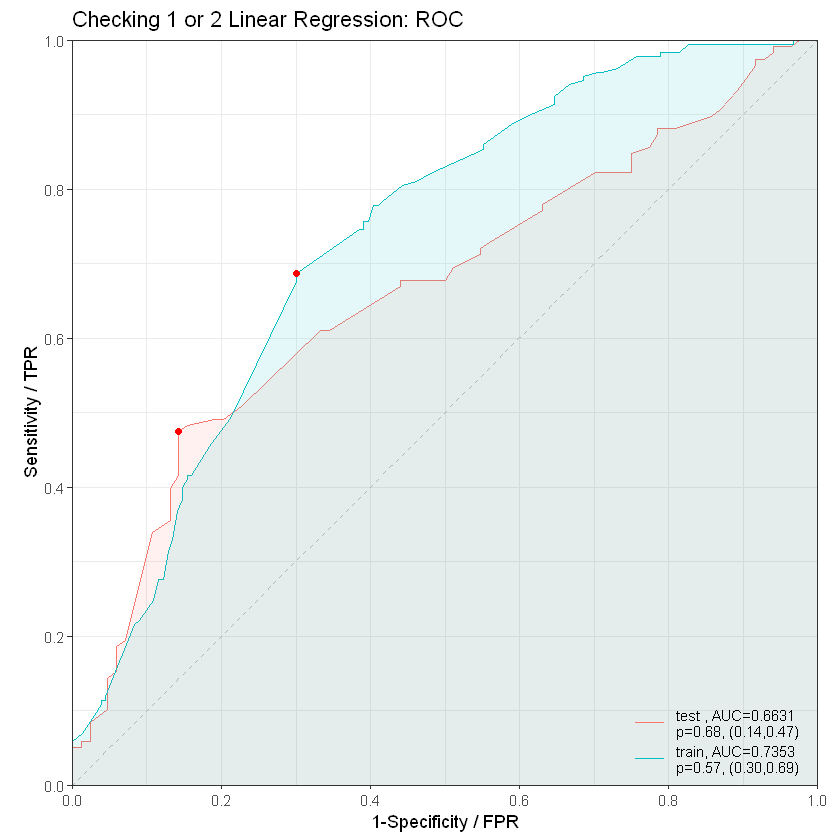

$binomial_metric
$binomial_metric$train
          KS      Gini
1: 0.3852044 0.4695426

$binomial_metric$test
          KS      Gini
1: 0.3317191 0.3249596


$confusion_matrix
$confusion_matrix$train
   label pred_0 pred_1      error
1:     0     49    107 0.68589744
2:     1      9    176 0.04864865
3: total     58    283 0.34017595

$confusion_matrix$test
   label pred_0 pred_1     error
1:     0     19     65 0.7738095
2:     1     16    102 0.1355932
3: total     35    167 0.4009901


$pic
TableGrob (1 x 1) "arrange": 1 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]


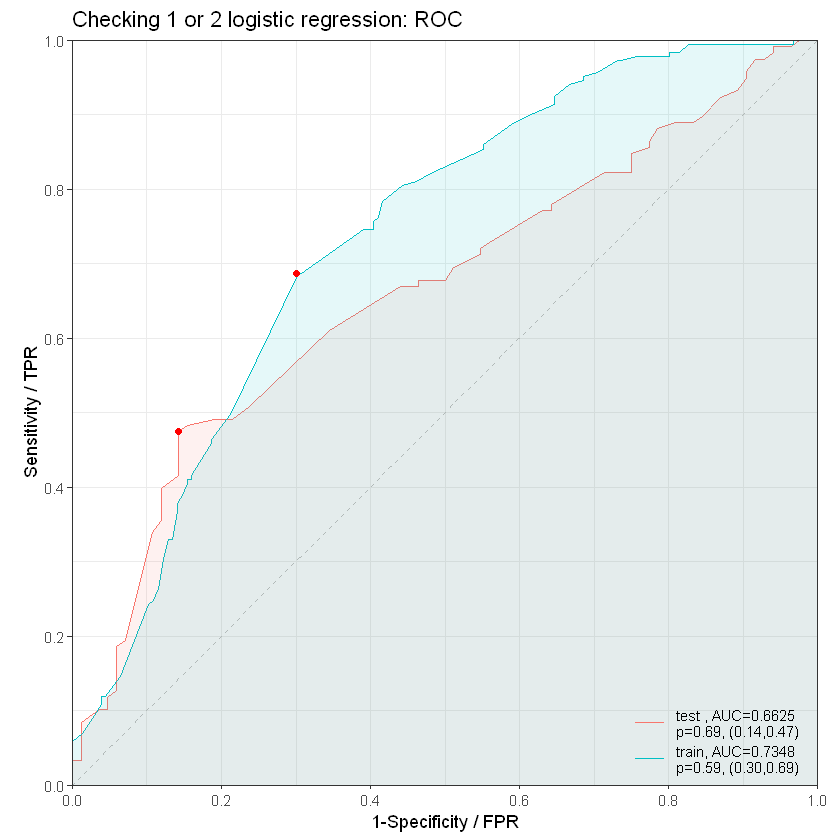

In [25]:
# ========================
# Model Evaluation using ROC, KS, and Gini
# ========================
# For subset 1 (Linear Regression) & (Logistic Regression)
s1_linear_pred <- lapply(s1_traintestsubset, function(x) predict(s1_linear, x, type='response'))
s1_linear_perf <- perf_eva(pred = s1_linear_pred, label=s1_label, binomial_metric = c('ks','gini'), 
                 show_plot = 'roc', title = 'Checking 1 or 2 Linear Regression', confusion_matrix = TRUE)
s1_linear_perf




# Logistic Regression subset 1
s1_logistic_pred <- lapply(s1_traintestsubset, function(x) predict(s1_logistic, x, type='response'))
s1_logistic_perf <- perf_eva(pred = s1_logistic_pred, label=s1_label, binomial_metric = c('ks','gini'), 
                 show_plot = 'roc', title = 'Checking 1 or 2 logistic regression', confusion_matrix = TRUE)
s1_logistic_perf


Warning message in log(1 - pred):
"NaNs produced"
Warning message in log(1 - pred):
"NaNs produced"
ℹ The threshold of confusion matrix is 0.5901.


$binomial_metric
$binomial_metric$train
          KS      Gini
1: 0.3727629 0.3986984

$binomial_metric$test
         KS      Gini
1: 0.367838 0.3972498


$confusion_matrix
$confusion_matrix$train
   label pred_0 pred_1      error
1:     0      4     39 0.90697674
2:     1      3    240 0.01234568
3: total      7    279 0.14685315

$confusion_matrix$test
   label pred_0 pred_1      error
1:     0     NA     17         NA
2:     1      3    151 0.01948052
3: total     NA    168         NA


$pic
TableGrob (1 x 1) "arrange": 1 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]


ℹ The threshold of confusion matrix is 0.4890.


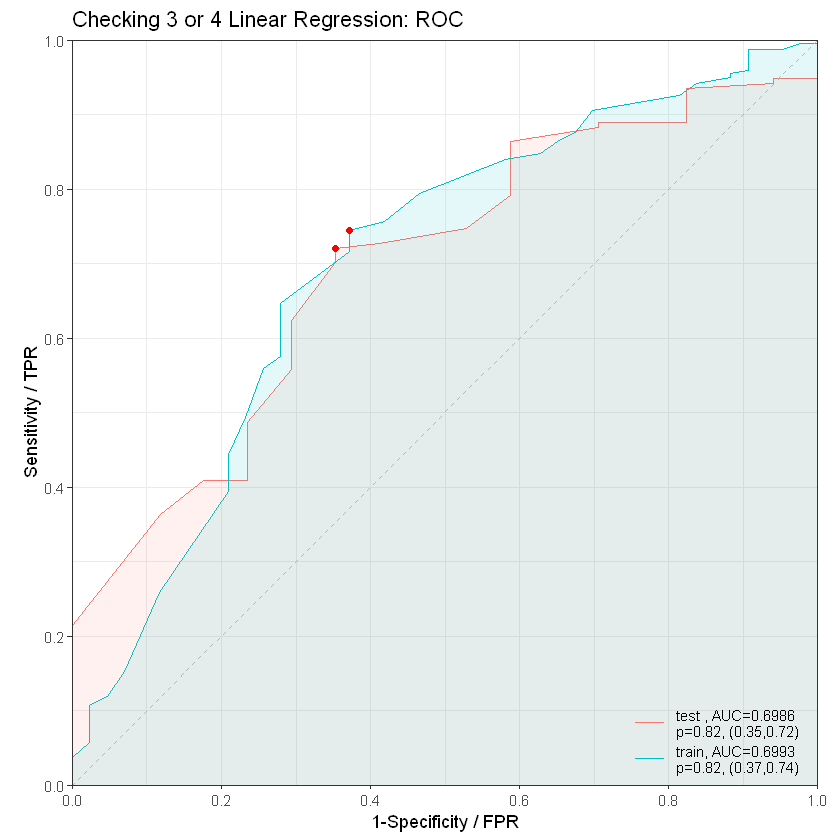

$binomial_metric
$binomial_metric$train
          KS      Gini
1: 0.3917121 0.3929563

$binomial_metric$test
         KS      Gini
1: 0.367838 0.3781513


$confusion_matrix
$confusion_matrix$train
   label pred_0 pred_1       error
1:     0      2     41 0.953488372
2:     1      1    242 0.004115226
3: total      3    283 0.146853147

$confusion_matrix$test
   label pred_0 pred_1      error
1:     0     NA     17         NA
2:     1      2    152 0.01298701
3: total     NA    169         NA


$pic
TableGrob (1 x 1) "arrange": 1 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]


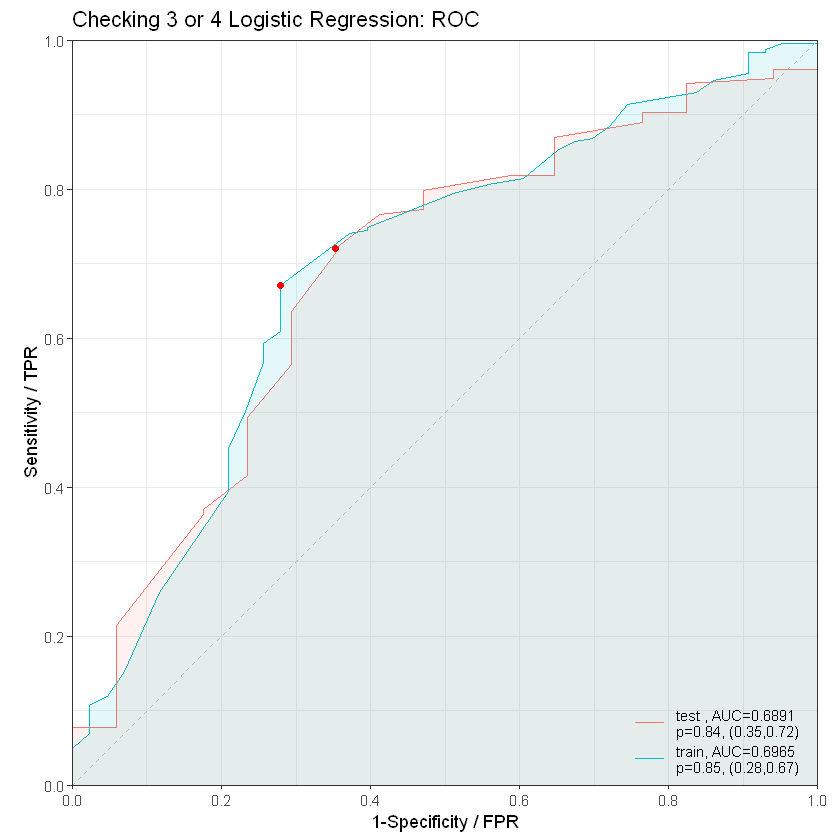

In [26]:
# ========================
# Model Evaluation using ROC, KS, and Gini
# ========================
# For subset 2 (Linear Regression) & (Logistic Regression)
s2_linear_pred <- lapply(s2_traintestsubset, function(x) predict(s2_linear, x, type='response'))
s2_linear_perf <- perf_eva(pred = s2_linear_pred, label=s2_label, binomial_metric = c('ks','gini'), 
                 show_plot = 'roc', title = 'Checking 3 or 4 Linear Regression', confusion_matrix = TRUE)
s2_linear_perf

                     
s2_logistic_pred <- lapply(s2_traintestsubset, function(x) predict(s2_logistic, x, type='response'))
s2_logistic_perf <- perf_eva(pred = s2_logistic_pred, label=s2_label, binomial_metric = c('ks','gini'), 
                 show_plot = 'roc', title = 'Checking 3 or 4 Logistic Regression', confusion_matrix = TRUE)
s2_logistic_perf
